In [11]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
ot.ResourceMap.SetAsUnsignedInteger("BernsteinCopulaFactory-MinM", 5)
ot.ResourceMap.SetAsUnsignedInteger("BernsteinCopulaFactory-MaxM", 20)

In [12]:
N = int(1e4)
x_sample = ot.Normal([2., 2.], [0.8] * 2).getSample(N)
df = pd.DataFrame(np.array(x_sample), columns=['x1', 'x2'])
rdf = df.rank() / N
df['y'] = (df['x1'] - df['x2']) ** 2 - 8 * (df['x1'] + df['x2'] - 5)
df['fail'] = df['y'] < 0
rdf['fail'] = df['fail']

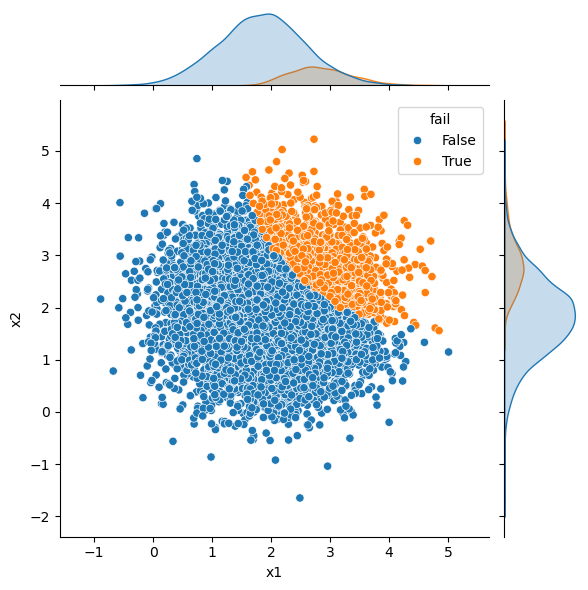

In [13]:
sns.jointplot(df, x='x1', y='x2', hue='fail');

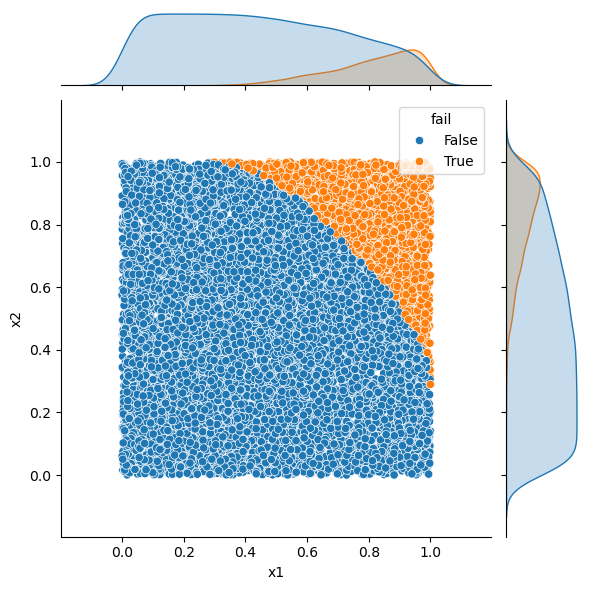

In [14]:
sns.jointplot(rdf, x='x1', y='x2', hue='fail');

In [15]:
failed_sample = ot.Sample(df[df['fail']==1][['x1', 'x2']].values)
failed_rsample = ot.Sample(rdf[rdf['fail']==1][['x1', 'x2']].values)

EBC m =  12


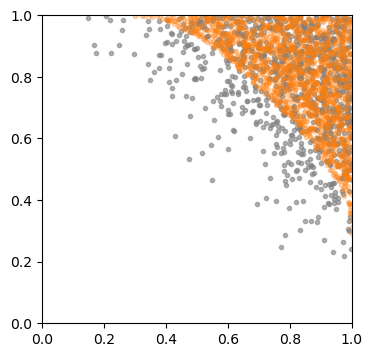

In [16]:
m_amise = ot.BernsteinCopulaFactory.ComputeAMISEBinNumber(failed_sample)
print("EBC m = ", m_amise)
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, m_amise, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);

In [17]:
from bancs import optimize_ebc_loglikehood
m_opt = optimize_ebc_loglikehood(failed_sample, kfolds=2)
bernstein_copula = ot.EmpiricalBernsteinCopula(failed_sample, m_opt)
print("EBC m = ", m_opt)

EBC m =  93


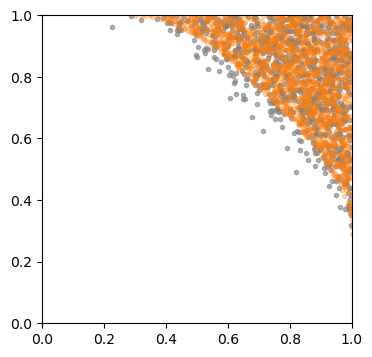

In [18]:
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, m_opt, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);

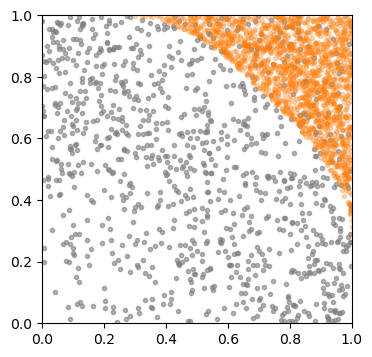

In [20]:
m_kl = ot.BernsteinCopulaFactory.ComputePenalizedCsiszarDivergenceBinNumber(failed_rsample, ot.SymbolicFunction(['t'], ['t * ln(t)']))
print(m_kl)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(4,4))
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.6, color="C7", marker='.')
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.3, color="C1", marker='.')
plt.xlim(0, 1)
plt.ylim(0, 1);